<a href="https://colab.research.google.com/github/Santosh344/RetaildataAnalysis/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing liberries... 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#fb prophet imports...
#fb prophet imports..... 
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import (plot_plotly, 
                            plot_components_plotly,
                            plot_forecast_component)

#should be version 0.6+
fbprophet.__version__

'0.7.1'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
min_val = min(df['Sales'])
max_val = max (df['Sales'])
range_data = (min_val, max_val)
print(range_data)

(0.444, 22638.48)


In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


Data Cleaning

In [ ]:
#dropping unwanted row....
df.drop(['Row ID', 'Customer ID','Customer Name','Product ID','Product Name'], axis = 1, inplace = True)
df.tail(365)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9435,CA-2016-119627,17/08/2016,23/08/2016,Standard Class,Consumer,United States,Peoria,Arizona,85345.0,West,Technology,Accessories,252.800,4,0.2,-31.6000
9436,CA-2016-160787,25/09/2016,25/09/2016,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,Office Supplies,Binders,2.946,2,0.7,-2.0622
9437,CA-2018-107853,26/05/2018,31/05/2018,Standard Class,Consumer,United States,Oceanside,California,92054.0,West,Office Supplies,Paper,12.960,2,0.0,6.2208
9438,CA-2018-126144,31/07/2018,5/8/2018,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,Technology,Phones,285.576,4,0.4,-57.1152
9439,US-2015-154655,12/10/2015,17/10/2015,Standard Class,Corporate,United States,Chicago,Illinois,60623.0,Central,Office Supplies,Supplies,22.240,2,0.2,2.5020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,3.798,3,0.8,-5.8869
9796,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,10.368,2,0.2,1.5552
9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,235.188,2,0.4,-43.1178
9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,26.376,4,0.4,2.6376


In [ ]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.dropna()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,3.7980,3,0.80,-5.8869
9796,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,10.3680,2,0.20,1.5552
9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,235.1880,2,0.40,-43.1178
9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,26.3760,4,0.40,2.6376


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9800 non-null   object 
 1   Order Date    9800 non-null   object 
 2   Ship Date     9800 non-null   object 
 3   Ship Mode     9800 non-null   object 
 4   Segment       9800 non-null   object 
 5   Country       9800 non-null   object 
 6   City          9800 non-null   object 
 7   State         9800 non-null   object 
 8   Postal Code   9789 non-null   float64
 9   Region        9800 non-null   object 
 10  Category      9800 non-null   object 
 11  Sub-Category  9800 non-null   object 
 12  Sales         9800 non-null   float64
 13  Quantity      9800 non-null   int64  
 14  Discount      9800 non-null   float64
 15  Profit        9800 non-null   float64
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df.dtypes

Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code     float64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.count()

Order ID        9800
Order Date      9800
Ship Date       9800
Ship Mode       9800
Segment         9800
Country         9800
City            9800
State           9800
Postal Code     9789
Region          9800
Category        9800
Sub-Category    9800
Sales           9800
Quantity        9800
Discount        9800
Profit          9800
dtype: int64

In [ ]:
df.duplicated().count() 

9800

In [ ]:
df = df.sort_values('Order Date')
df = df.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
df


,ds,y
0,1/1/2018,1481.828
1,1/10/2015,4.710
2,1/10/2016,1158.414
3,1/10/2017,781.414
4,1/10/2018,2978.466
...,...,...
1225,9/8/2016,4878.392
1226,9/8/2017,661.354
1227,9/9/2015,4043.588
1228,9/9/2017,84.992


Forecasting using mmodel prophet


In [ ]:
#the data has been prepared as per the model prophet requirement. so lets try out model to forecast for next one year.....
m = Prophet(interval_width=0.95, daily_seasonality=False)
m.fit(df)

In [ ]:
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1590,2019-12-26
1591,2019-12-27
1592,2019-12-28
1593,2019-12-29
1594,2019-12-30


In [ ]:
#forecasting for one year....
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1590,2019-12-26,2520.174968,-1003.648485,7748.216226,2511.617061,2528.999713,819.572156,819.572156,819.572156,-211.867131,-211.867131,-211.867131,1031.439287,1031.439287,1031.439287,0.0,0.0,0.0,3339.747123
1591,2019-12-27,2520.861324,-774.266068,7818.767414,2512.264243,2529.727797,974.982441,974.982441,974.982441,-98.374966,-98.374966,-98.374966,1073.357406,1073.357406,1073.357406,0.0,0.0,0.0,3495.843765
1592,2019-12-28,2521.547681,-597.902867,8315.160531,2512.911426,2530.455881,1392.069359,1392.069359,1392.069359,291.848557,291.848557,291.848557,1100.220802,1100.220802,1100.220802,0.0,0.0,0.0,3913.617040
1593,2019-12-29,2522.234037,-1039.517550,8044.980964,2513.558609,2531.183965,1007.215988,1007.215988,1007.215988,-103.788878,-103.788878,-103.788878,1111.004866,1111.004866,1111.004866,0.0,0.0,0.0,3529.450025
1594,2019-12-30,2522.920394,-737.490231,7918.275525,2514.205791,2531.912049,1150.253054,1150.253054,1150.253054,45.172027,45.172027,45.172027,1105.081027,1105.081027,1105.081027,0.0,0.0,0.0,3673.173448


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #as per required..

,ds,yhat,yhat_lower,yhat_upper
1590,2019-12-26,3339.747123,-1003.648485,7748.216226
1591,2019-12-27,3495.843765,-774.266068,7818.767414
1592,2019-12-28,3913.617040,-597.902867,8315.160531
1593,2019-12-29,3529.450025,-1039.517550,8044.980964
1594,2019-12-30,3673.173448,-737.490231,7918.275525


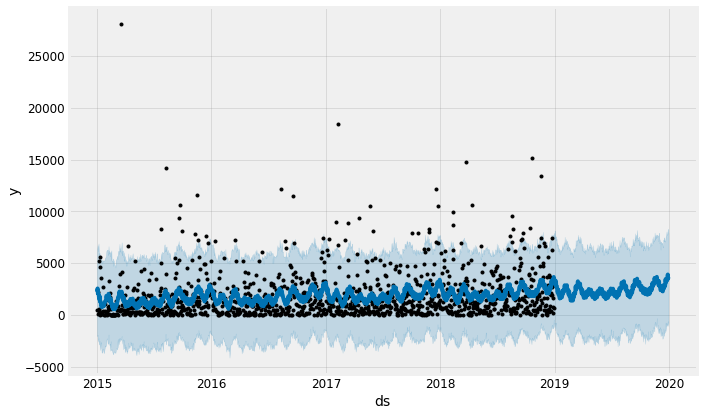

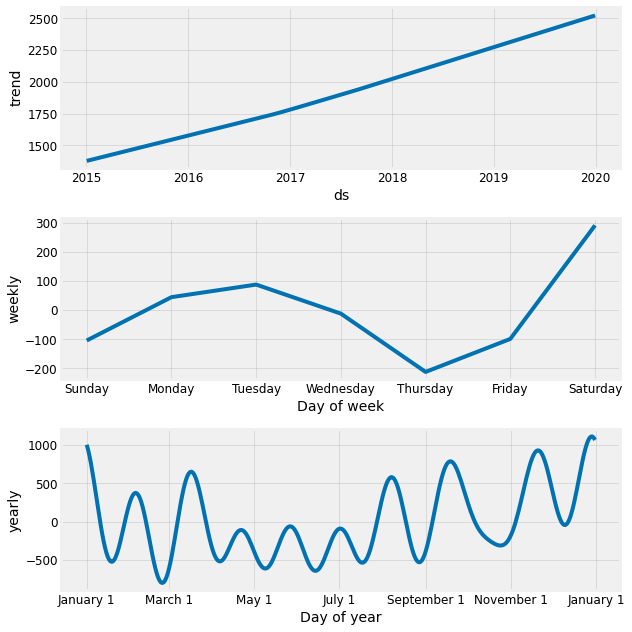

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

,ds,yhat,y
1590,2019-12-26,3339.747123,NaN
1591,2019-12-27,3495.843765,NaN
1592,2019-12-28,3913.617040,NaN
1593,2019-12-29,3529.450025,NaN
1594,2019-12-30,3673.173448,NaN


In [ ]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
1225,2018-12-26,3301.472831,814.5940
1226,2018-12-27,3140.005274,177.6360
1227,2018-12-28,3277.108386,1657.3508
1228,2018-12-29,3674.668290,2915.5340
1229,2018-12-30,3269.566647,713.7900


In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.06199295087915124

In [ ]:

mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2222.23


1487.092737032995

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_pred - y_true) /np.abs(y_true))) * 100
print('Mean absolute percentage error: ',mean_absolute_percentage_error(df.y,forecast.yhat))

Mean absolute percentage error:  1029.9191238425078


Adding Holiday Parameter 

In [ ]:
m = Prophet(interval_width = 0.95)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [ ]:
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1590,2019-12-26
1591,2019-12-27
1592,2019-12-28
1593,2019-12-29
1594,2019-12-30


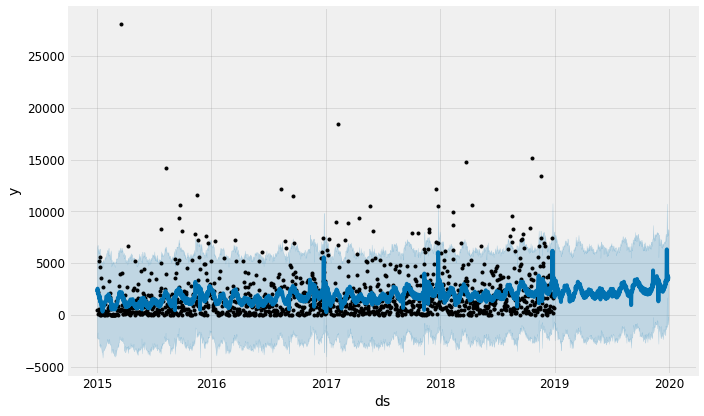

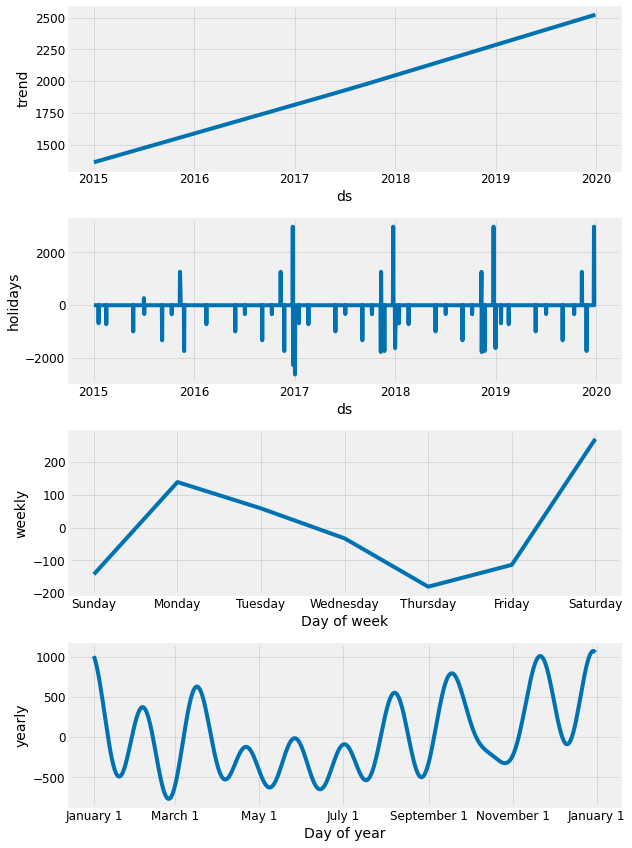

In [ ]:
forecast = m.predict(future)
m.plot(forecast)
fig = m.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2207.78


1474.4902765298855

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.07414514992096499

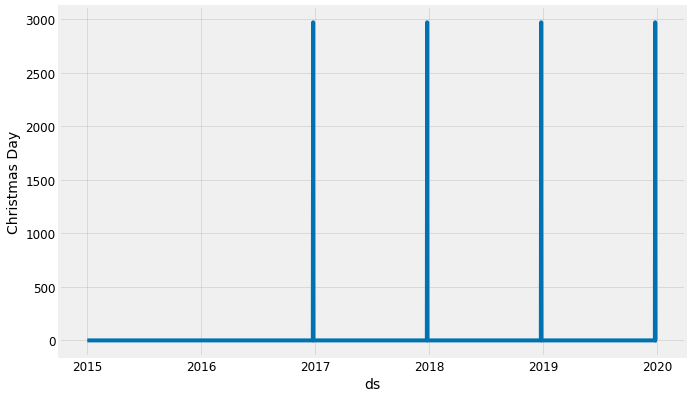

In [ ]:
#lets check individual holiday effect.....
plot_forecast_component(m, forecast, 'Christmas Day');

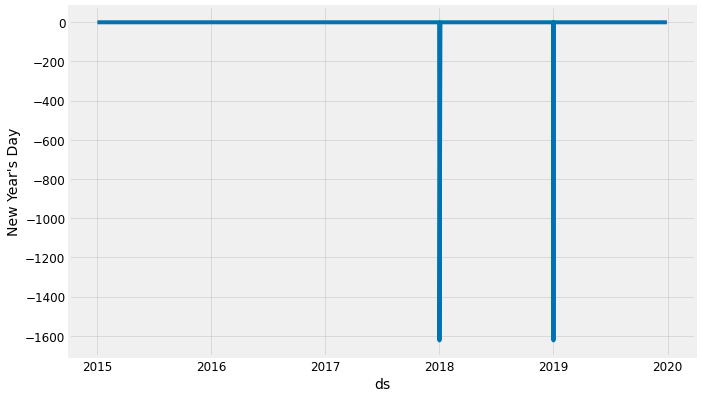

In [ ]:
#lets check individual holiday effect.....
plot_forecast_component(m, forecast, "New Year's Day");

Looking Into Montly Seasonality.....

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


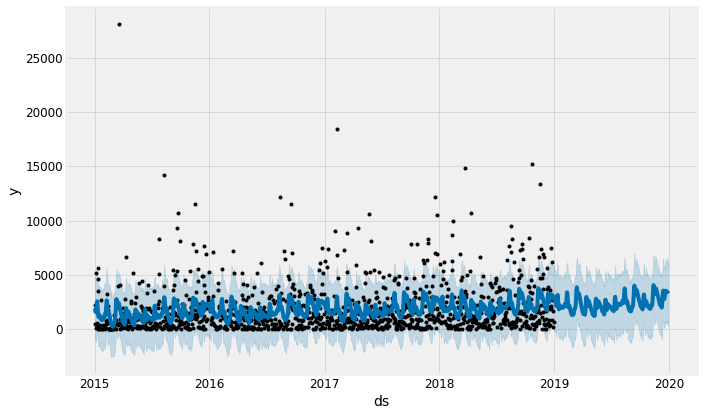

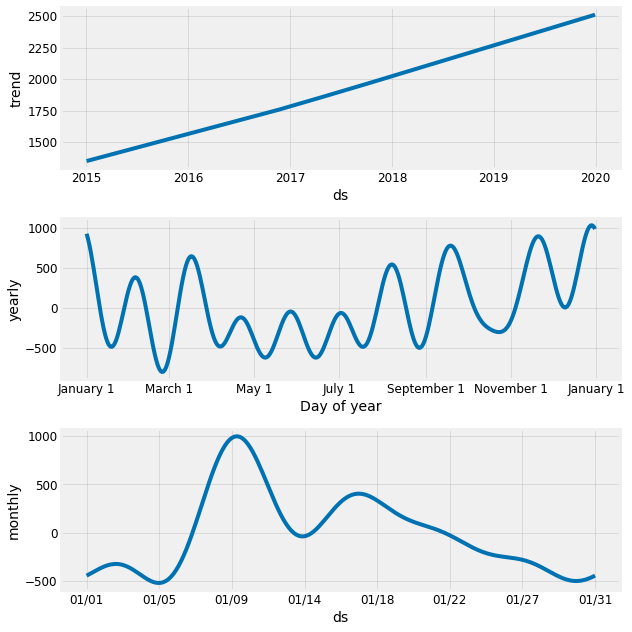

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()
#forecating
forecast = m.predict(future)
m.plot(forecast)
fig = m.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2188.53


1460.332508116937

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.0902243765100541

Adding Summer Season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


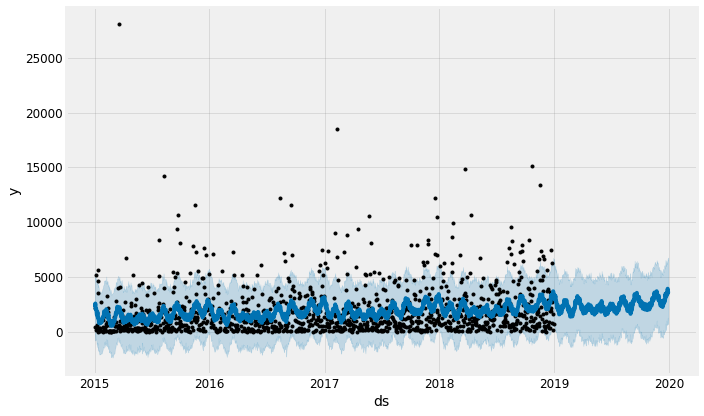

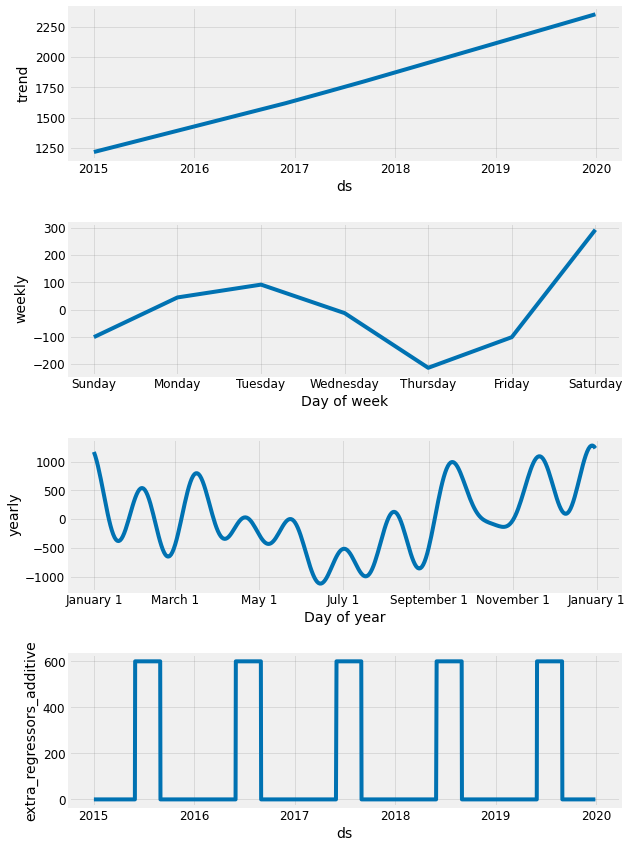

In [ ]:
def season(ds):
    date = pd.to_datetime(ds)
    if date.month >= 6 and date.month <= 8:
      return 1
    else:
      return 0

df['season'] = df['ds'].apply(season)

m = Prophet()
m.add_regressor('season')
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

#Addiing Summer Sunday...
future['season'] = future['ds'].apply(season)
forecast = m.predict(future)

#plotting Component....
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2221.51


1484.7683234699527

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.06260137528331344

Adding NFL On Season and Off Season 

In [ ]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


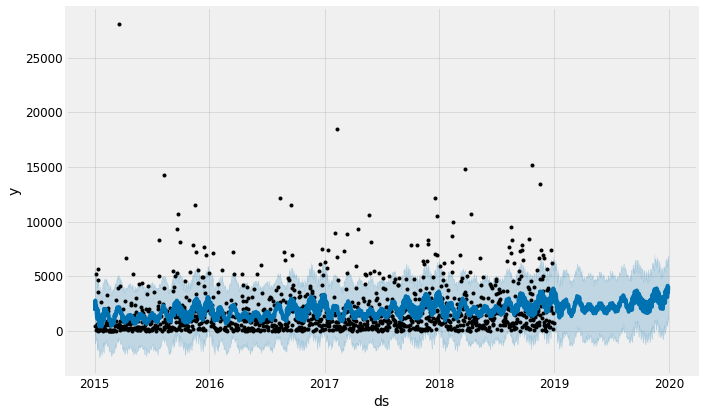

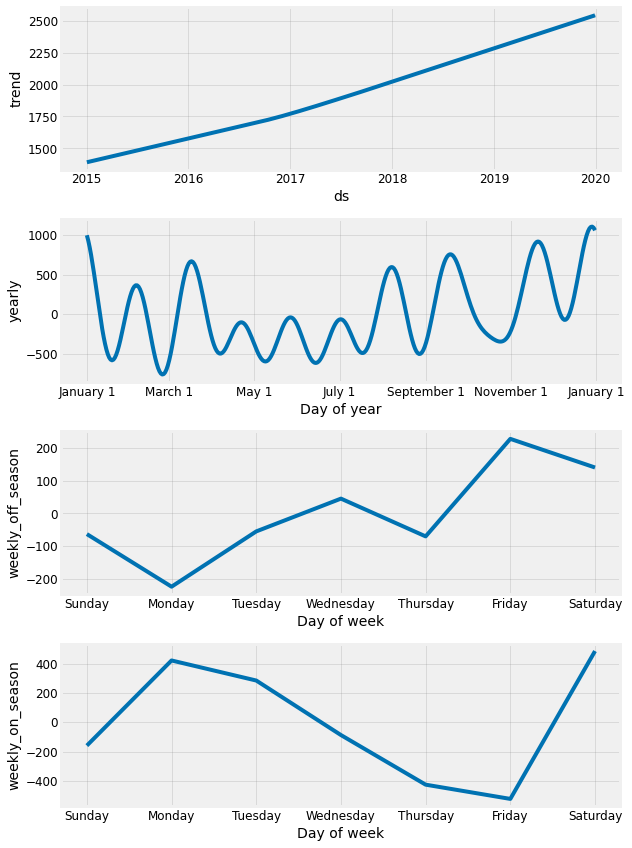

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(df)
#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
#forecating
forecast = m.predict(future)
m.plot(forecast)

fig = m.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2212.13


1481.902466173412

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.07049572137246574

Adding NFL Sunday..

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


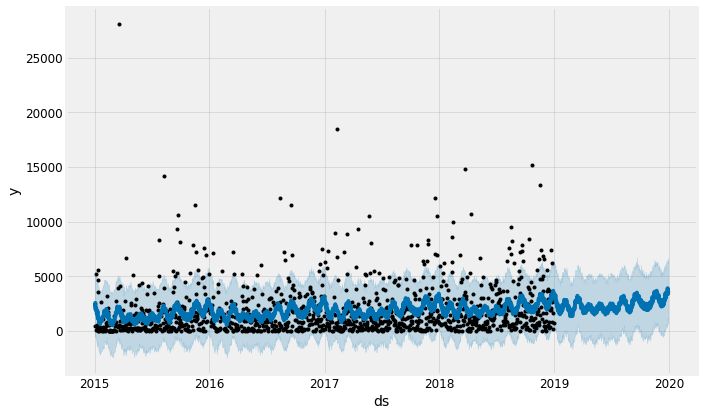

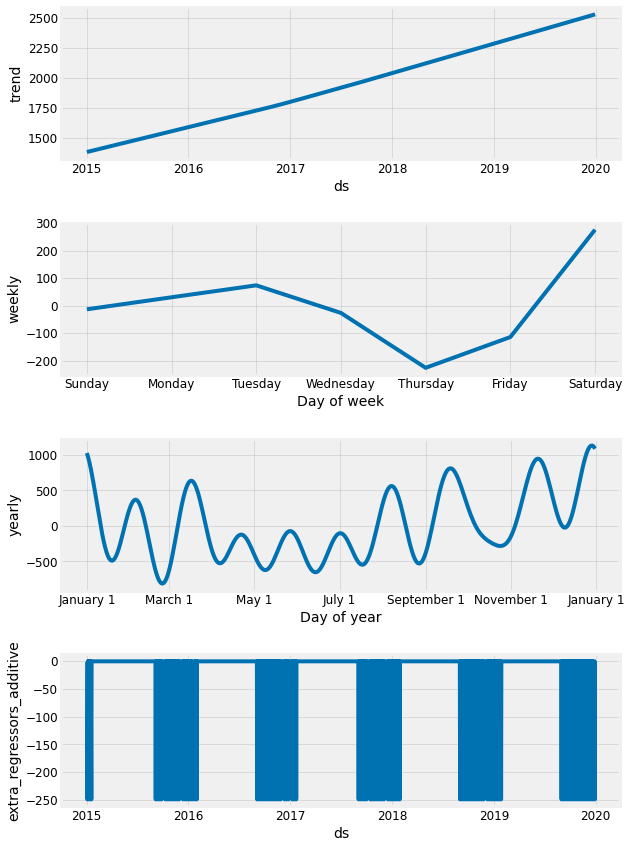

In [ ]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

#making predictionof next one year
future = m.make_future_dataframe(periods=365)
future.tail()

#Addiing NFL  Sunday...
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
forecast = m.predict(future)

#plotting Component....
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2221.94


1487.7067381035308

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.06223253949155905

Adding all the Parameter 

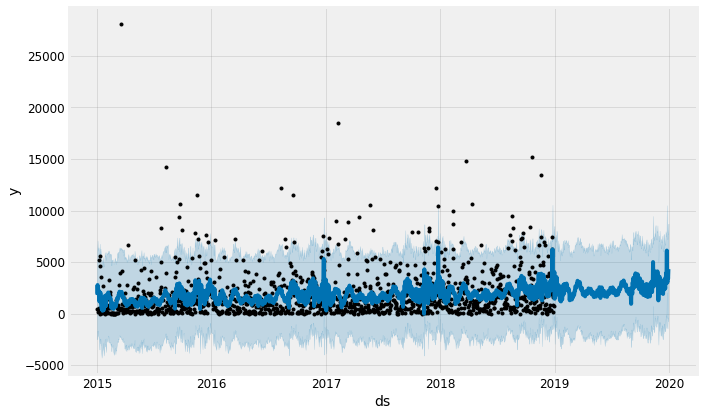

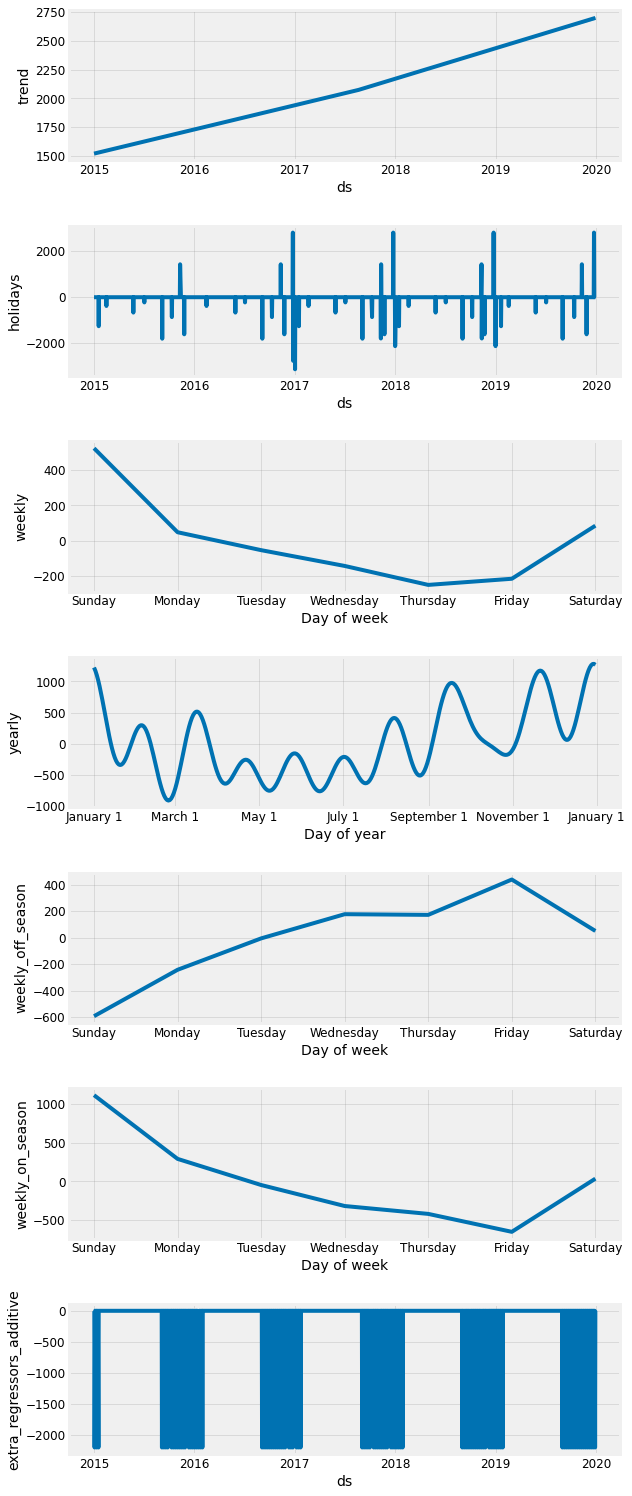

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=False)
m.add_country_holidays(country_name='US')
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.add_regressor('nfl_sunday')
m.fit(df)

#making prediction of next one year
future = m.make_future_dataframe(periods=365)

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
future.tail()

forecast = m.predict(future)

#plotting the components 
fig = m.plot(forecast)
fig = m.plot_components(forecast)


In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

metric_df.dropna(inplace=True)
metric_df.tail()

#Model Evaluation
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
mean_absolute_error(metric_df.y, metric_df.yhat)

The Root Mean Squared Error of our forecasts is 2194.85


1466.695038908796

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.08496272714861375

implmentating forecasting with the use of one more model ARIMA

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,3,0.80,-5.8869
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2,0.20,1.5552
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2,0.40,-43.1178
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,4,0.40,2.6376


In [ ]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [ ]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['Category'] == 'Office Supplies']

In [ ]:
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

('1/1/2018', '9/9/2018')

In [ ]:
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,12/6/2017,14.620
4,11/10/2016,22.368
6,9/6/2015,7.280
8,9/6/2015,18.504
9,9/6/2015,114.900


In [ ]:
furniture = Furniture[['Order Date','Sales']]

NameError: ignored

In [ ]:
technology = Technology[['Order Date','Sales']]

In [ ]:
office_supplies['Order Date'] = pd.to_datetime(office_supplies['Order Date'])
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

In [ ]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

In [ ]:
office_supplies.index

In [ ]:

monthly = office_supplies['Sales'].resample('MS').mean() 
monthly

In [ ]:
monthly = office_supplies['Sales'].resample('MS').sum() 
monthly

In [ ]:
yearly = office_supplies['Sales'].resample('Y').sum() 
yearly

In [ ]:
yearly = office_supplies['Sales'].resample('Y').mean() 
yearly

In [ ]:
#visulizing time Series Data.....
monthly.plot(figsize = (16, 7))
plt.show()

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [ ]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))